# 1. Cargar datos del CSV

Esta sección se encarga de importar las librerías necesarias (`pandas` para el manejo de datos y `matplotlib.pyplot` para la visualización) y cargar el archivo `ventas.csv` en un DataFrame de pandas. Además, convierte la columna 'fecha' a un formato de fecha y hora para permitir operaciones temporales.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ventas.csv')
df['fecha'] = pd.to_datetime(df['fecha'])

# 2. Calcular ventas totales por mes

In [3]:
df['mes'] = df['fecha'].dt.to_period('M')

ventas_por_mes = df.groupby('mes').apply(lambda d: (d['cantidad'] * d['precio']).sum())

ventas_por_mes = ventas_por_mes.sort_index()

print("Ventas por mes:")

print(ventas_por_mes)

Ventas por mes:
mes
2025-01    167.5
2025-02     85.0
2025-03    156.5
2025-04    172.0
2025-05     80.0
2025-06     61.0
2025-07    125.0
2025-08    167.5
2025-09    130.0
2025-10     96.5
2025-11     80.0
2025-12    152.0
Freq: M, dtype: float64


C:\Users\WIN11PRO\AppData\Local\Temp\ipykernel_26376\2940971828.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ventas_por_mes = df.groupby('mes').apply(lambda d: (d['cantidad'] * d['precio']).sum())


# 3. Determinar producto más vendido y con mayor ingresos

Esta sección tiene como objetivo identificar cuál fue el producto más vendido en términos de unidades y cuál generó mayores ingresos. Para ello, se calcula el ingreso total por cada venta y luego se agrupan los datos por 'producto' para sumar las cantidades vendidas y los ingresos generados por cada uno. Se imprimen los nombres de los productos junto con sus totales correspondientes.

In [4]:
df['ingreso'] = df['cantidad'] * df['precio']

ventas_prod = df.groupby('producto').agg({

    'cantidad': 'sum',

    'ingreso': 'sum'

})

mas_vendido = ventas_prod['cantidad'].idxmax()

mayor_ingreso = ventas_prod['ingreso'].idxmax()

print(f"Producto más vendido en unidades: {mas_vendido} (total {ventas_prod.loc[mas_vendido, 'cantidad']})")

print(f"Producto con mayores ingresos: {mayor_ingreso} (total {ventas_prod.loc[mayor_ingreso, 'ingreso']:.2f} €)")

Producto más vendido en unidades: A (total 37)
Producto con mayores ingresos: C (total 403.00 €)


# 4. Graficar ventas por mes

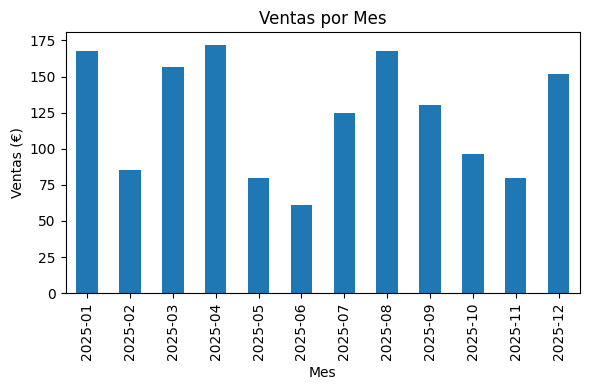

In [5]:
ventas_por_mes.index = ventas_por_mes.index.astype(str)

plt.figure(figsize=(6,4))

ventas_por_mes.plot(kind='bar')

plt.title("Ventas por Mes")
plt.xlabel("Mes")
plt.ylabel("Ventas (€)")
plt.tight_layout()
plt.savefig("ventas_por_mes.png")
plt.show()

# 5. Graficar top 5 productos por ingresos

Aquí se genera un gráfico de barras para mostrar los 5 productos que generaron mayores ingresos. Se seleccionan los 5 productos con mayores ingresos del DataFrame `ventas_prod` y se traza un gráfico de barras con sus ingresos. El gráfico también se guarda como 'top5_productos.png'.

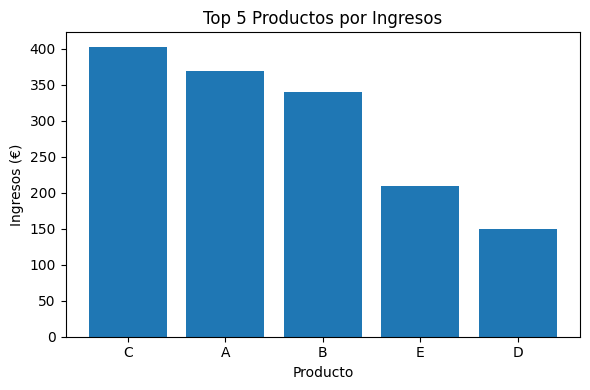

In [7]:
top5 = ventas_prod.nlargest(5, 'ingreso')

plt.figure(figsize=(6,4))
plt.bar(top5.index, top5['ingreso'])
plt.title("Top 5 Productos por Ingresos")
plt.ylabel("Ingresos (€)")
plt.xlabel("Producto")
plt.tight_layout()
plt.savefig("top5_productos.png")
plt.show()

Este proyecto muestra cómo combinar múltiples herramientas:

- Usamos pandas para análisis: en un par de líneas agrupamos y calculamos valores, lo que sería mucho más tedioso manualmente.
- Usamos matplotlib para visualizar resultados, algo crucial en data science.
- Cursor nos habrá ayudado, quizás sugiriendo la fórmula de ingresos, la forma de agrupar, etc. Si le preguntaste "¿Cómo agrupo las ventas por mes en pandas?".